# Урок 3. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка. 

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов. 

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import math

In [33]:
# data preview
iris_dataset = load_iris()
# print(type(load_iris()))
# print(dir(iris_dataset))
# print(iris_dataset.keys())
# print(iris_dataset['DESCR'])
print(iris_dataset['target_names'])
iris_df = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],
                     columns= iris_dataset['feature_names'] + ['target'])
iris_df['label'] = iris_df.target.replace(dict(enumerate(iris_dataset.target_names)))
# 0 - setosa, 1 - versicolor, 2 - virginica
iris_df.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [34]:
# 1) (sepal length, petal length, petal width)
iris_dataset1 = load_iris()
iris_df1 = pd.DataFrame(data= np.c_[iris_dataset1['data'], iris_dataset1['target']],
                     columns= iris_dataset1['feature_names'] + ['target'])
iris_df1['label'] = iris_df1.target.replace(dict(enumerate(iris_dataset1.target_names)))
iris_df1=iris_df1.drop(['sepal width (cm)'], axis=1)
iris_df1.head()

,sepal length (cm),petal length (cm),petal width (cm),target,label
0,5.1,1.4,0.2,0.0,setosa
1,4.9,1.4,0.2,0.0,setosa
2,4.7,1.3,0.2,0.0,setosa
3,4.6,1.5,0.2,0.0,setosa
4,5.0,1.4,0.2,0.0,setosa


In [35]:
# 2) (sepal width, petal length, petal width).
iris_dataset2 = load_iris()
iris_df2 = pd.DataFrame(data= np.c_[iris_dataset2['data'], iris_dataset2['target']],
                     columns= iris_dataset2['feature_names'] + ['target'])
iris_df2['label'] = iris_df2.target.replace(dict(enumerate(iris_dataset2.target_names)))
iris_df2=iris_df2.drop(['sepal length (cm)'], axis=1)
iris_df2.head()

,sepal width (cm),petal length (cm),petal width (cm),target,label
0,3.5,1.4,0.2,0.0,setosa
1,3.0,1.4,0.2,0.0,setosa
2,3.2,1.3,0.2,0.0,setosa
3,3.1,1.5,0.2,0.0,setosa
4,3.6,1.4,0.2,0.0,setosa


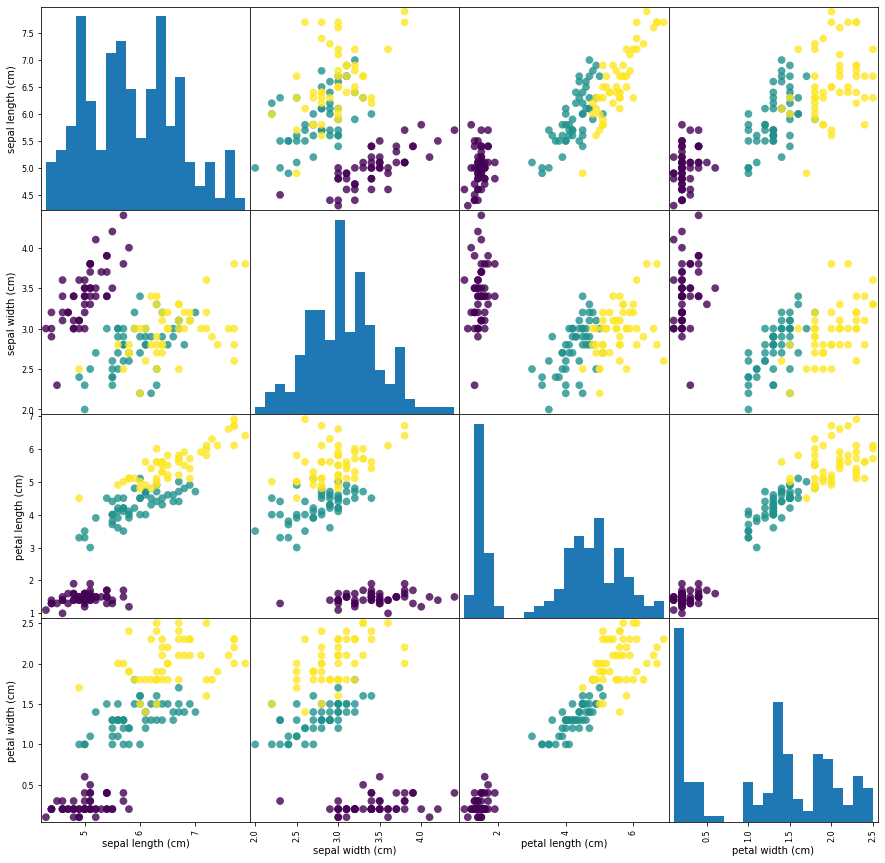

In [36]:
df=iris_df.drop(['target', 'label'], axis=1)
scat_mtrx = pd.plotting.scatter_matrix(df, c=iris_dataset['target'], figsize=(15, 15), marker='o', 
                                       hist_kwds={'bins': 20}, s=60, alpha=.8)

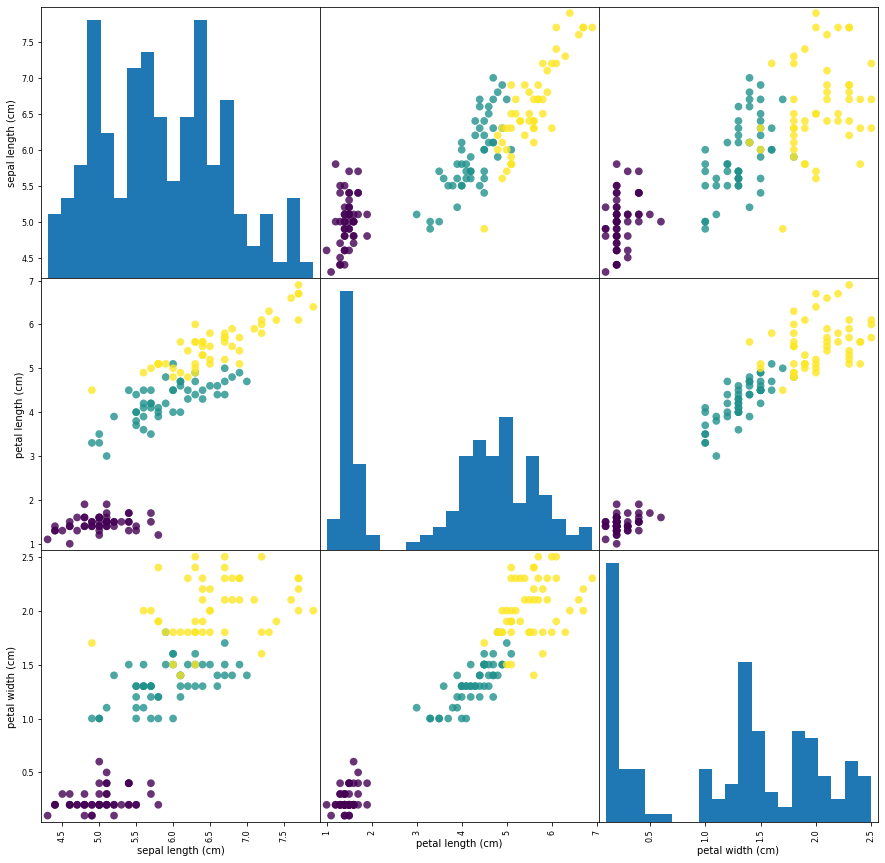

In [37]:
df1=iris_df1.drop(['target', 'label'], axis=1)
scat_mtrx = pd.plotting.scatter_matrix(df1, c=iris_dataset1['target'], figsize=(15, 15), marker='o', 
                                       hist_kwds={'bins': 20}, s=60, alpha=.8)

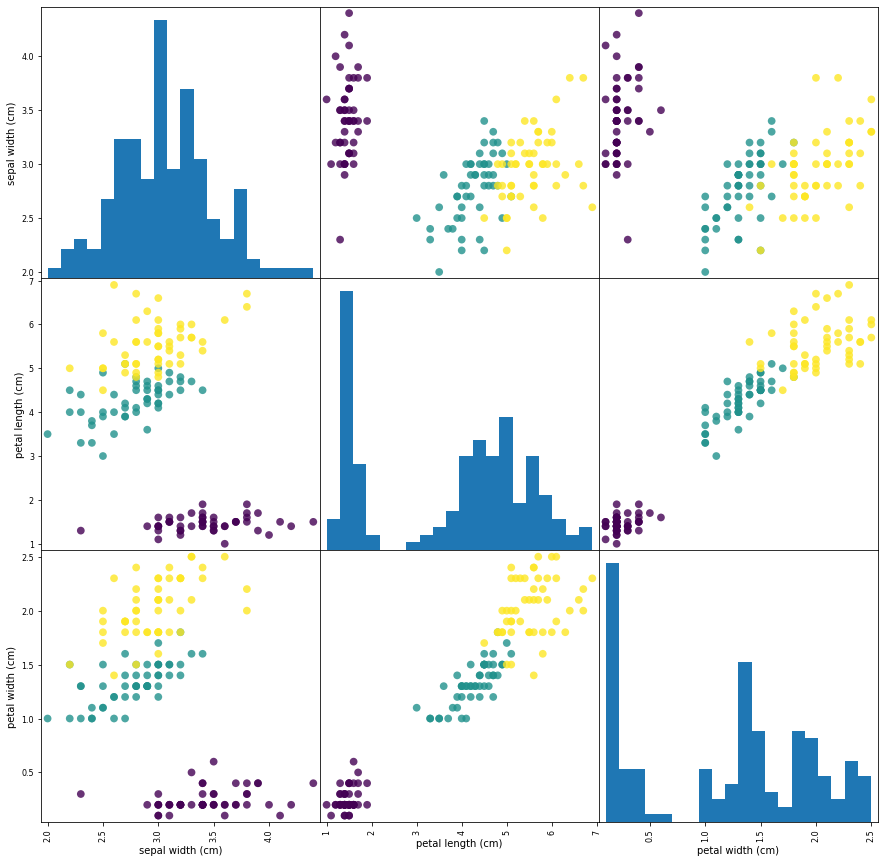

In [38]:
df2=iris_df2.drop(['target', 'label'], axis=1)
scat_mtrx = pd.plotting.scatter_matrix(df2, c=iris_dataset1['target'], figsize=(15, 15), marker='o', 
                                       hist_kwds={'bins': 20}, s=60, alpha=.8)

### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

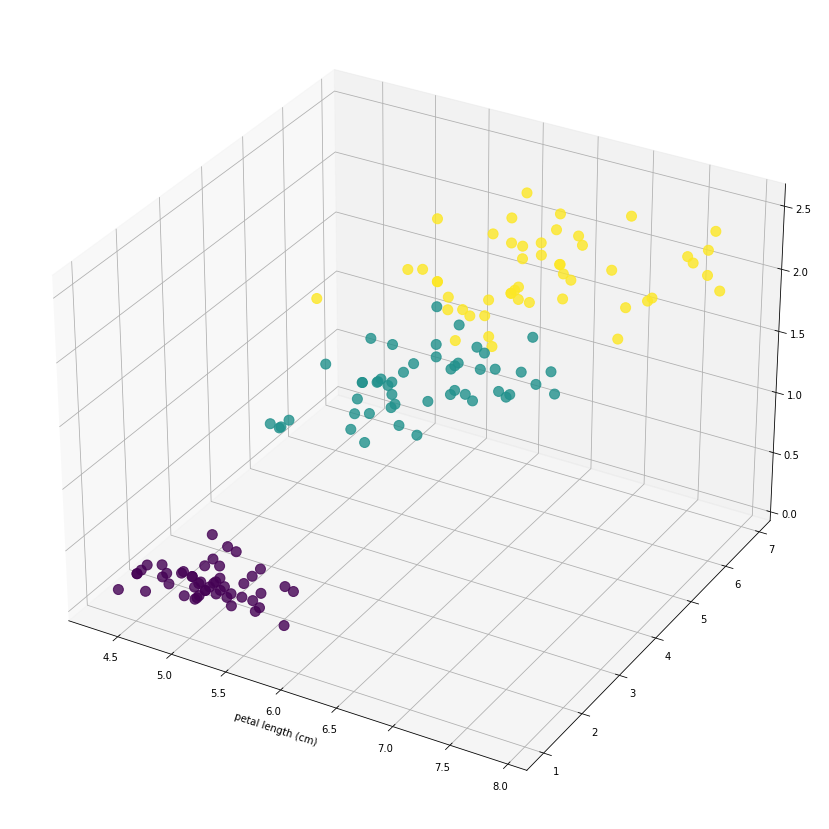

In [39]:
fig=plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

xdata = iris_df1.iloc[:,0:1]
ydata = iris_df1.iloc[:,1:2]
zdata = iris_df1.iloc[:,2:3]
colors = np.random.randint(3, size=len(xdata))

# ax.scatter3D(xdata[iris_df.label=='setosa'], ydata[iris_df.label=='setosa'],
#              zdata [iris_df.label=='setosa'], alpha=.8, s=100, c='r')
# ax.scatter3D(xdata[iris_df.label=='versicolor'], ydata[iris_df.label=='versicolor'],
#              zdata [iris_df.label=='versicolor'], alpha=.8, s=100, c='g')
# ax.scatter3D(xdata[iris_df.label=='virginica'], ydata[iris_df.label=='virginica'],
#              zdata [iris_df.label=='virginica'], alpha=.8, s=100, c='b')

ax.scatter3D(xdata, ydata, zdata, alpha=.8, s=100, c=iris_dataset1.target)

plt.xlabel(iris_df.keys()[0])
plt.xlabel(iris_df.keys()[1])
plt.xlabel(iris_df.keys()[2])

plt.show()

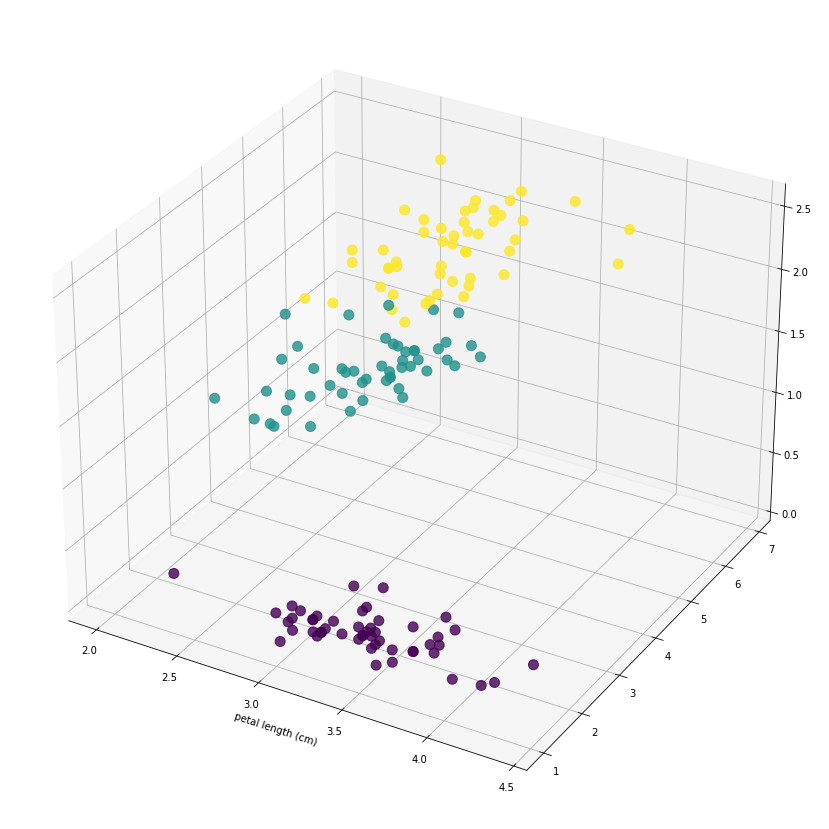

In [40]:
fig=plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
xdata = iris_df2.iloc[:,0:1]
ydata = iris_df2.iloc[:,1:2]
zdata = iris_df2.iloc[:,2:3]
colors = np.random.randint(3, size=len(xdata))
ax.scatter3D(xdata, ydata, zdata, alpha=.8, s=100, c=iris_dataset2.target)
plt.xlabel(iris_df.keys()[0])
plt.xlabel(iris_df.keys()[1])
plt.xlabel(iris_df.keys()[2])
plt.show()

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [41]:
x_train, x_test, y_train, y_test=train_test_split(np.array(iris_df.drop(['label', 'target'], axis=1)),
                                                  np.array(iris_df['target']),
                                                  random_state=17
                                                  )
x_train1, x_test1, y_train1, y_test1=train_test_split(np.array(iris_df1.drop(['label', 'target'], axis=1)),
                                                  np.array(iris_df1['target']),
                                                  random_state=17
                                                  )
x_train2, x_test2, y_train2, y_test2=train_test_split(np.array(iris_df2.drop(['label', 'target'], axis=1)),
                                                  np.array(iris_df2['target']),
                                                  random_state=17
                                                  )
knn = KNeighborsClassifier(n_neighbors=5)

In [42]:
knn_model = knn.fit(x_train, y_train)
knn_predictions=knn.predict(x_test)
print(knn_predictions)

[0. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 0. 1. 0. 2. 0. 0. 2. 2. 2. 1. 0. 2. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 2.]


In [43]:
knn_model1 = knn.fit(x_train1, y_train1)
knn_predictions1=knn.predict(x_test1)
print(knn_predictions1)

[0. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 0. 1. 0. 2. 0. 0. 2. 2. 2. 1. 0. 2. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 2.]


In [44]:
knn_model2 = knn.fit(x_train2, y_train2)
knn_predictions2=knn.predict(x_test2)
print(knn_predictions2)


[0. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 0. 1. 0. 2. 0. 0. 2. 2. 2. 1. 0. 2. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 2.]


### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [45]:
accuracy=accuracy_score(y_test, knn_predictions)
print(f"Accuracy: {accuracy}")
accuracy1=accuracy_score(y_test, knn_predictions1)
print(f"Accuracy: {accuracy1}")
accuracy2=accuracy_score(y_test, knn_predictions2)
print(f"Accuracy: {accuracy2}")

Accuracy: 0.9473684210526315
Accuracy: 0.9736842105263158
Accuracy: 0.9736842105263158


### 5.
Постройте модель на данных *x_train1, y_train1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

Best accuracy 0.92105 is reached with n_neighbors in [6, 7, 8, 9, 10, 16, 17, 18, 19, 20]


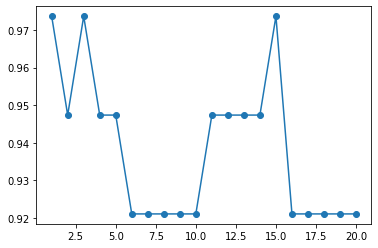

In [46]:
knn_list=[KNeighborsClassifier(n_neighbors=i) for i in range(1,21)]
accuracy_list=[]
for knn in knn_list:
    knn_model = knn.fit(x_train, y_train)
    knn_predictions=knn.predict(x_test)
    accuracy=accuracy_score(y_test, knn_predictions)
    accuracy_list.append(accuracy)
# print (accuracy_list)
min (accuracy_list)

plt.plot(np.linspace(1,20, 20), accuracy_list)
plt.scatter(np.linspace(1,20, 20), accuracy_list)
min_=min(accuracy_list)
n_list=[]
for i in range (len(accuracy_list)):
    if accuracy_list[i]==min_:
        n_list.append(i+1)

print (f"Best accuracy {round(min_,5)} is reached with n_neighbors in {n_list}")

# val, ind = min((val, ind) for (ind, val) in enumerate(accuracy_list))

In [47]:
# custom implementation of kkn algorhitm
x_train, x_test, y_train, y_test=train_test_split(np.array(iris_df.drop(['label', 'target'], axis=1)),
                                                  np.array(iris_df['target']),
                                                  random_state=17
                                                  )
x_train_concat, x_test_concat, y_train, y_test=train_test_split(np.array(iris_df.drop(['label'], axis=1)),
                                                  np.array(iris_df['target']),
                                                  random_state=17
                                                  )
# print(x_train_concat[:5])
# print(x_train[:5])

def euclidean_distance(data1, data2):
    distance=0
    for i in range (len(data1)-1):
        distance+=(data1[i]-data2[i])**2
    return math.sqrt(distance)

def get_neighbors(train, test, k=1): # k is a number of neighbors
    
    distances=[(train[i][-1], euclidean_distance(train[i], test))
              for i in range (len(train))]
    distances.sort(key=lambda elem: elem[1])
    neighbors=[distances[i][0] for i in range (k)]
    return neighbors

def prediction(neighbors):
    count={}
    for instance in neighbors:
        if instance in count:
            count[instance]+=1
        else:
            count[instance]=1
        target=max(count.items(), key=lambda x:x[1])[0]
        return target

def accuracy(test, test_prediction):
    correct=0
    for i in range(len(test)):
        if test[i][-1]==test_prediction[i]:
            correct+=1
    return (correct/len(test))

def accuracy(test, test_prediction):
    correct=0
    for i in range(len(test)):
        if test[i][-1]==test_prediction[i]:
            correct+=1
    return (correct/len(test))

predictions=[]
for x in range(len(x_test_concat)):
    neighbors=get_neighbors(x_train_concat, x_test_concat[x], k=5)
    result=prediction(neighbors)
    predictions.append(result)
    print(f'predicted = {result}, actual = {x_test_concat[x][-1]}, Equals: {result==x_test_concat[x][-1]}')
accuracy_=accuracy(x_test_concat, predictions)
print(f'Accuracy: {round(accuracy_, 5)}')


predicted = 0.0, actual = 0.0, Equals: True
predicted = 1.0, actual = 1.0, Equals: True
predicted = 2.0, actual = 2.0, Equals: True
predicted = 1.0, actual = 1.0, Equals: True
predicted = 2.0, actual = 2.0, Equals: True
predicted = 2.0, actual = 2.0, Equals: True
predicted = 1.0, actual = 1.0, Equals: True
predicted = 2.0, actual = 2.0, Equals: True
predicted = 1.0, actual = 1.0, Equals: True
predicted = 2.0, actual = 2.0, Equals: True
predicted = 2.0, actual = 2.0, Equals: True
predicted = 0.0, actual = 0.0, Equals: True
predicted = 1.0, actual = 1.0, Equals: True
predicted = 0.0, actual = 0.0, Equals: True
predicted = 2.0, actual = 2.0, Equals: True
predicted = 0.0, actual = 0.0, Equals: True
predicted = 0.0, actual = 0.0, Equals: True
predicted = 2.0, actual = 2.0, Equals: True
predicted = 2.0, actual = 2.0, Equals: True
predicted = 2.0, actual = 2.0, Equals: True
predicted = 1.0, actual = 2.0, Equals: False
predicted = 0.0, actual = 0.0, Equals: True
predicted = 2.0, actual = 2.0, 